In [36]:
import pandas as pd

In [37]:
df=pd.read_csv('Social_Network_Ads.csv')

In [38]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [40]:
df.shape

(400, 3)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Purchased'],test_size=0.3,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [8]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [9]:
import numpy as np
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


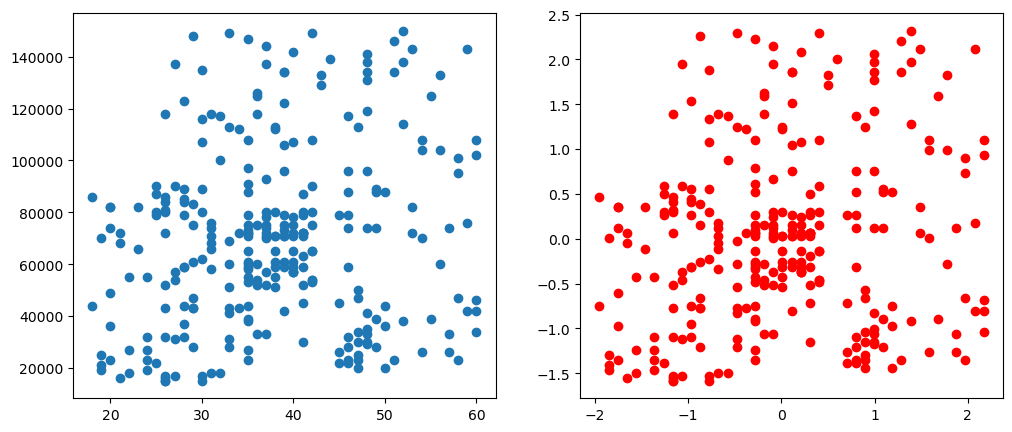

In [10]:
fig, (ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.show()

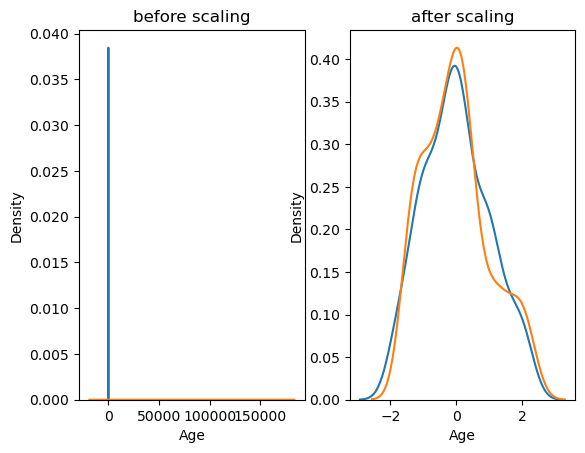

In [11]:
fig ,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
ax1.set_title('before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

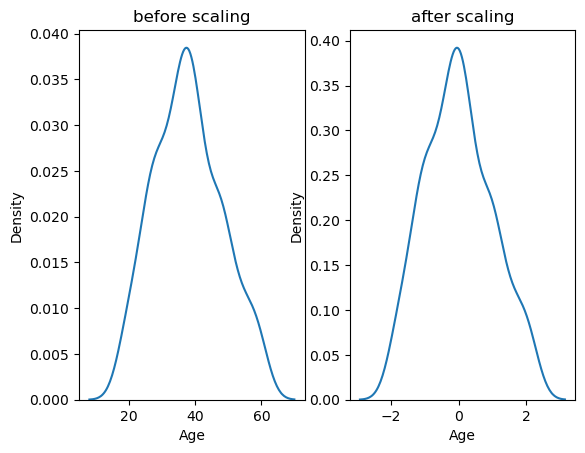

In [12]:
fig ,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
ax1.set_title('before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

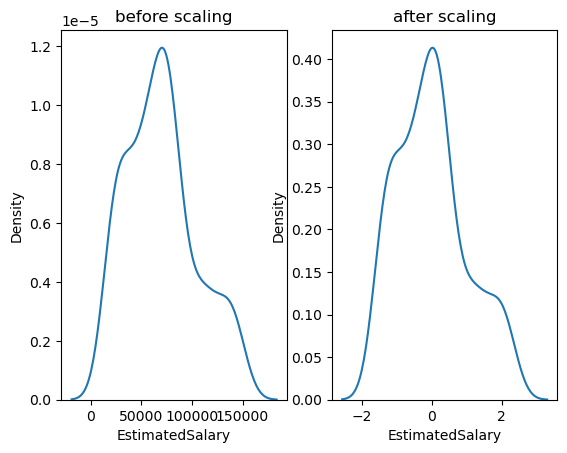

In [13]:
fig ,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
ax1.set_title('before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

## kuch algos m scaling is very necessary like logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [15]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc_scaled=accuracy_score(y_test,y_pred_scaled)

In [20]:
print(f"acc   {acc}")
print(f"acc_scaled   {acc_scaled}")

acc   0.6583333333333333
acc_scaled   0.8666666666666667


 ## kuch algos m not necessary like decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier()
dr_scaled=DecisionTreeClassifier()

In [28]:
dr.fit(X_train,y_train)
dr_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dr.predict(X_test)
y_pred_scaled=dr_scaled.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc_scaled=accuracy_score(y_test,y_pred_scaled)

In [31]:
print(f"acc   {acc}")
print(f"acc_scaled   {acc_scaled}")

acc   0.875
acc_scaled   0.875


## effect of outlier through standarization

In [43]:

df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


C:\Users\Aditi.vjain\AppData\Local\Temp\ipykernel_12696\1286931311.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


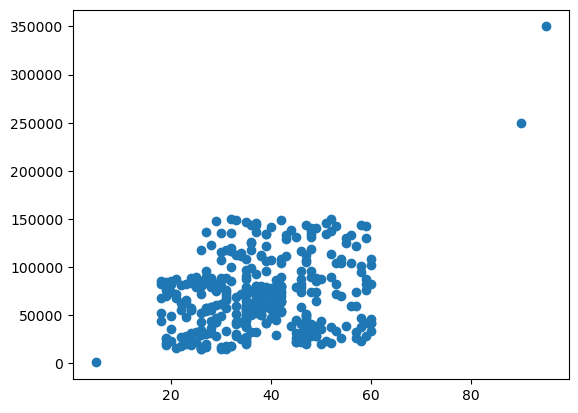

In [44]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Purchased'],test_size=0.3,random_state=12)

In [48]:
scaler.fit(X_train)

StandardScaler()

In [51]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_test.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

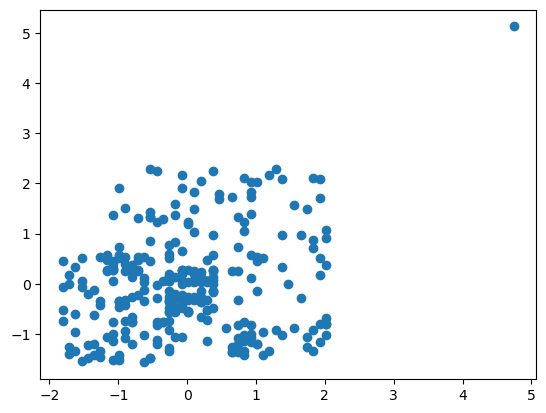

In [54]:
plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])

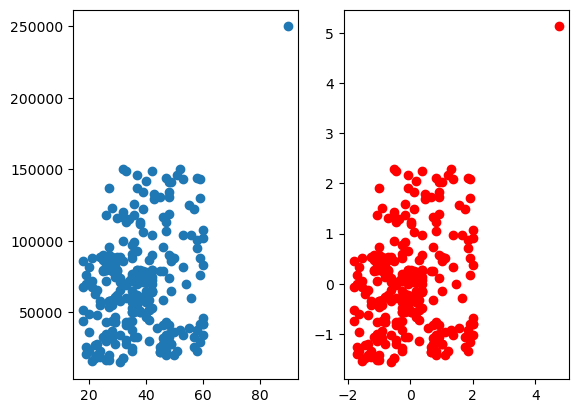

In [58]:
fig, (ax1,ax2)=plt.subplots(nrows=1,ncols=2)
ax1.set_title="before scaling"
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.set_title="After scaling"
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color="red")